## Experiment Design
The experiment is designed to resolve the problem of using normal sound card to make the beacon identifiable in the environment. The intuition is given there are natural noise exists in the environment, and most of environment are pink or red noise ($\beta = 1\sim 2$, i.e. power concentrate at the low frequency), can we inject some high frequency signal that "balance" the noise to white ($\beta \approx 0$). The high frequency signal can be in the near-ultraband with relativly low amplitude to ensure it is inaudiable. If it works, when the user pass the beacon, the microphone will detect an down-hill then up-hill variation of $\beta$, which notifies the existence of beacon.

The parameter $\beta$ is the exponent of frequency $f$ in the power-frequency relationship, as shown below.

If we plot the Power with respect to frequency in a log-log scale plot, and use linear regression to approximate the variation, the value of the slope is $\beta$

$$\log P = k - \beta \log f$$
$$\Rightarrow P = \frac{K}{f^\beta}$$

where $P$ is the power, $f$ is frequency and $k$ is the intercept of the line.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyaudio
import wave
from pydub import AudioSegment
import scipy
from scipy.io import wavfile #audio i/o
from IPython.display import Audio #listening to audio
import thinkdsp
import thinkstats2
%matplotlib inline

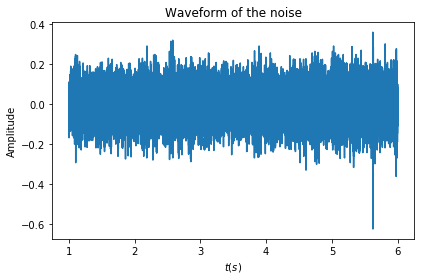

In [3]:
noise = thinkdsp.read_wave('noise2.wav').segment(start = 1, duration = 5)
noise.plot()
thinkdsp.decorate(xlabel = '$t (s)$', ylabel = 'Amplitude', title = 'Waveform of the noise')
noise.make_audio()

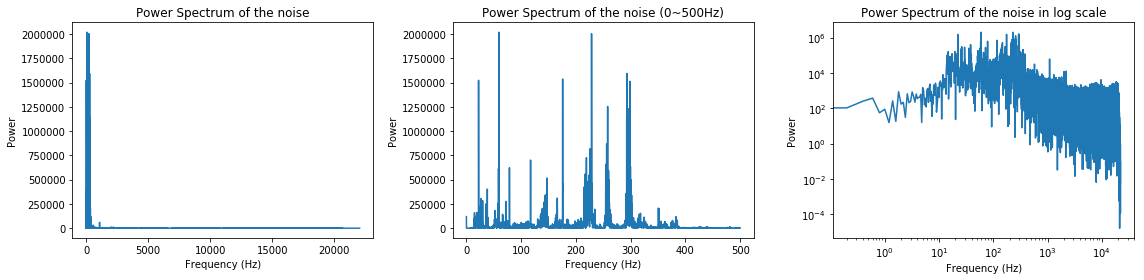

In [4]:
noise_spec = noise.make_spectrum()
plt.figure(figsize = (16,4))
plt.subplot(131)
noise_spec.plot_power()
thinkdsp.decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', title = 'Power Spectrum of the noise')
plt.subplot(132)
noise_spec.plot_power(high = 500)
thinkdsp.decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', title = 'Power Spectrum of the noise (0~500Hz)')
plt.subplot(133)
noise_spec.plot_power()
plt.xscale('log')
plt.yscale('log')
thinkdsp.decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', title = 'Power Spectrum of the noise in log scale')

In [9]:
signal = thinkdsp.Chirp(start = 5000, end = 5000)
wave = signal.make_wave(duration = 1)
wave.make_audio()

LinregressResult(slope=-0.8181985157032613, intercept=12.117333931766213, rvalue=-0.4077735984601519, pvalue=0.0, stderr=0.005517781693991128)

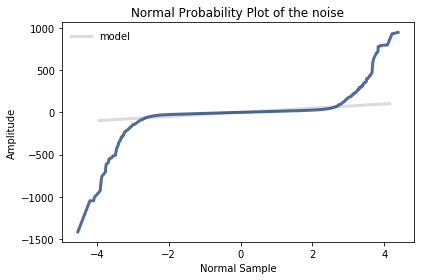

In [110]:
thinkstats2.NormalProbabilityPlot(noise_spec.real)
thinkdsp.decorate(xlabel = "Normal Sample", ylabel = "Amplitude", title = "Normal Probability Plot of the noise")
noise_spec.estimate_slope()

In relatively quiet environment, $\beta \approx -0.82$

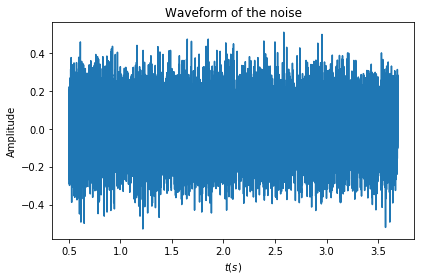

In [115]:
noise2 = thinkdsp.read_wave('noise3.wav').segment(start = 0.5)
noise2.plot()
thinkdsp.decorate(xlabel = '$t (s)$', ylabel = 'Amplitude', title = 'Waveform of the noise')
noise2.make_audio()

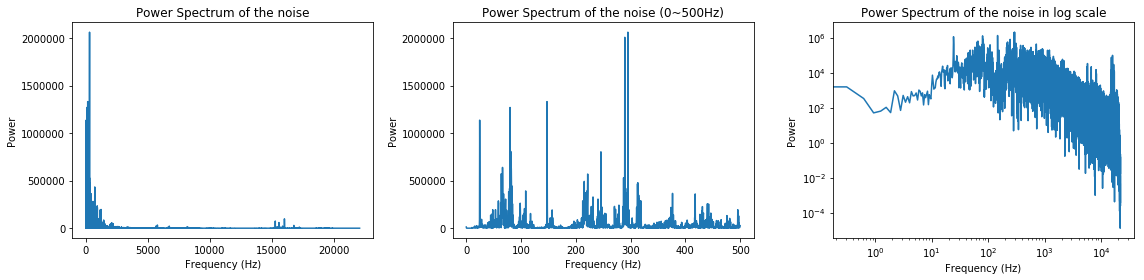

In [116]:
noise2_spec = noise2.make_spectrum()
plt.figure(figsize = (16,4))
plt.subplot(131)
noise2_spec.plot_power()
thinkdsp.decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', title = 'Power Spectrum of the noise')
plt.subplot(132)
noise2_spec.plot_power(high = 500)
thinkdsp.decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', title = 'Power Spectrum of the noise (0~500Hz)')
plt.subplot(133)
noise2_spec.plot_power()
plt.xscale('log')
plt.yscale('log')
thinkdsp.decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', title = 'Power Spectrum of the noise in log scale')

LinregressResult(slope=-1.8251081100143955, intercept=20.65699558619733, rvalue=-0.701439022290528, pvalue=0.0, stderr=0.006992483791329391)

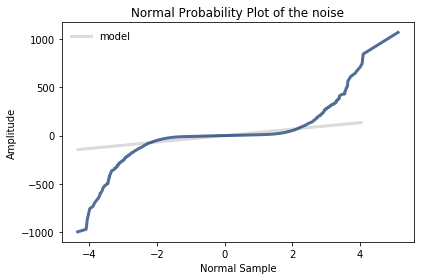

In [117]:
thinkstats2.NormalProbabilityPlot(noise2_spec.real)
thinkdsp.decorate(xlabel = "Normal Sample", ylabel = "Amplitude", title = "Normal Probability Plot of the noise")
noise2_spec.estimate_slope()

In relatively noisy environment, $\beta = -1.82$

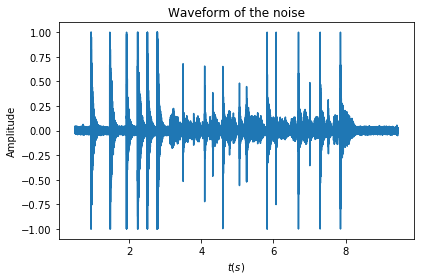

In [137]:
noise3 = thinkdsp.read_wave('noise4.wav').segment(start = 0.5)
noise3.plot()
thinkdsp.decorate(xlabel = '$t (s)$', ylabel = 'Amplitude', title = 'Waveform of the noise')
noise3.make_audio()

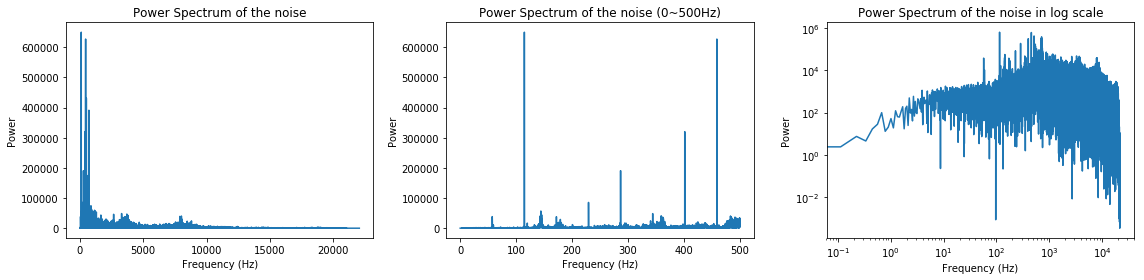

In [138]:
noise3_spec = noise3.make_spectrum()
plt.figure(figsize = (16,4))
plt.subplot(131)
noise3_spec.plot_power()
thinkdsp.decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', title = 'Power Spectrum of the noise')
plt.subplot(132)
noise3_spec.plot_power(high = 500)
thinkdsp.decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', title = 'Power Spectrum of the noise (0~500Hz)')
plt.subplot(133)
noise3_spec.plot_power()
plt.xscale('log')
plt.yscale('log')
thinkdsp.decorate(xlabel = 'Frequency (Hz)', ylabel = 'Power', title = 'Power Spectrum of the noise in log scale')

### Attempt #1 inject white noise

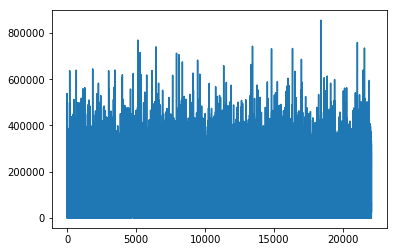

In [118]:
whitenoise_sig = thinkdsp.UncorrelatedUniformNoise()
whitenoise = whitenoise_sig.make_wave(duration = 5, framerate = 44100)
whitenoise_spec = whitenoise.make_spectrum()
whitenoise_spec.plot_power()

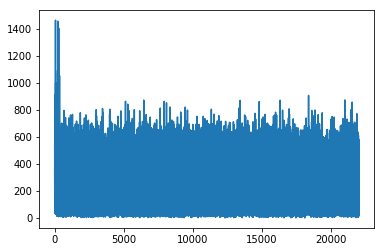

In [119]:
noise_spec_diff = thinkdsp.Spectrum(noise_spec.hs+whitenoise_spec.hs, noise_spec.fs, noise_spec.framerate)
noise_spec_diff.plot()

LinregressResult(slope=-0.028693893570630947, intercept=10.900217622440884, rvalue=-0.022381634675405392, pvalue=1.066239782958778e-13, stderr=0.0038601440896479373)

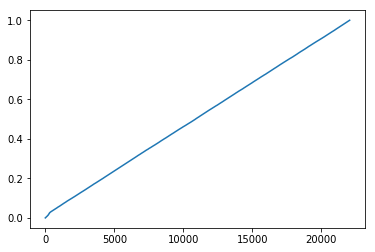

In [120]:
noise_intspec_diff = noise_spec_diff.make_integrated_spectrum()
noise_intspec_diff.plot_power()
noise_spec_diff.estimate_slope()

In [121]:
comp_noise = noise_spec_diff.make_wave()
comp_noise.make_audio()

Test the received noise in quite environment.

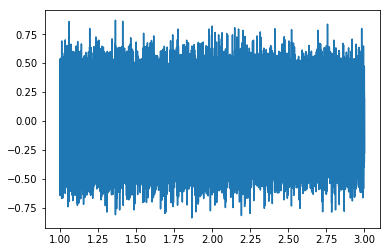

In [122]:
recv_noise = thinkdsp.read_wave('comp_noise.wav').segment(start = 1, duration = 2)
recv_noise.plot()

In [123]:
recv_noise_spec = recv_noise.make_spectrum()
recv_noise_spec.estimate_slope()

LinregressResult(slope=-0.6350702563564147, intercept=12.61603208006504, rvalue=-0.2641022977449316, pvalue=0.0, stderr=0.01104434540650733)

$\beta = -0.63$
The slope increases a little, but the change is not conspicious. Since the while noise includes all the frequency, to make it inaudible, the amplitude should be small enough.

Still in the quiet environment, increase the amplitude a little and make the microphone close to the speaker.

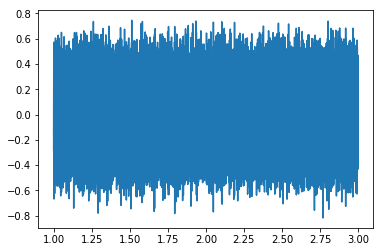

In [124]:
recv_noise = thinkdsp.read_wave('comp_noise2.wav').segment(start = 1, duration = 2)
recv_noise.plot()

In [125]:
recv_noise_spec = recv_noise.make_spectrum()
recv_noise_spec.estimate_slope()

LinregressResult(slope=-0.3909052588800001, intercept=9.935577404584587, rvalue=-0.1305038397992363, pvalue=9.367186116361651e-167, stderr=0.014141928317437926)

$\beta = -0.39$ increases, the change is quite conspicious.

### Attempt #2 only inject high frequency signal

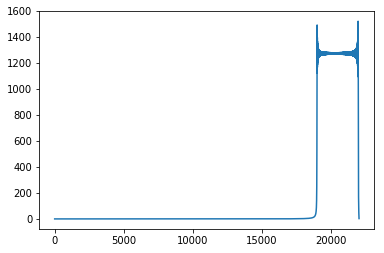

In [128]:
# Generate a chirp from 19kHz to 22kHz as the signal to be injected, 
# the sound is inaudible for me, even the amp is quite big
high_comp = thinkdsp.Chirp(start = 19000, end = 22000, amp = 1)
high_comp_wave = high_comp.make_wave(duration = 10, framerate = 44100)
high_comp_spec = high_comp_wave.make_spectrum()
high_comp_spec.plot()


In [127]:
high_comp_wave.make_audio()

Test in quiet environment

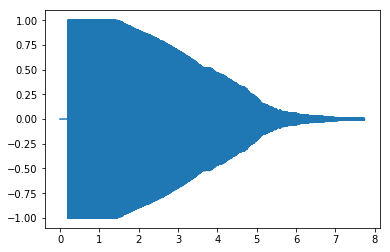

In [129]:
recv_noise = thinkdsp.read_wave('comp_noise3.wav')
recv_noise.plot()

In [130]:
recv_noise_spec = recv_noise.make_spectrum()
recv_noise_spec.estimate_slope()

LinregressResult(slope=0.2638463113206825, intercept=3.3835210112869207, rvalue=0.0896779776087941, pvalue=1.232628954299151e-301, stderr=0.007093157452844513)

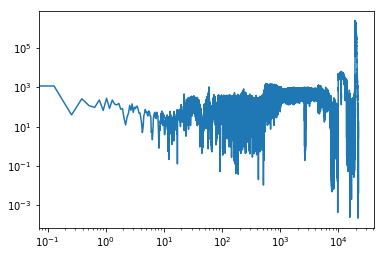

In [131]:
recv_noise_spec.plot_power()
plt.xscale('log')
plt.yscale('log')

$\beta = 0.26$, seems to be a little over compensate. But the change is conspicious.

Test in noisy environment

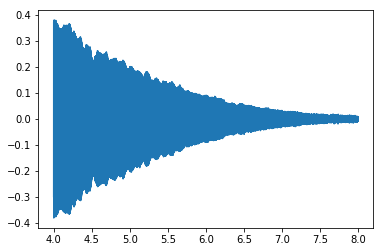

In [132]:
recv_noise = thinkdsp.read_wave('comp_noise4_1.wav').segment(start = 4, duration = 4)
recv_noise.plot()

In [133]:
recv_noise_spec = recv_noise.make_spectrum()
recv_noise_spec.estimate_slope()

LinregressResult(slope=0.09540224016163816, intercept=-1.4241726933771344, rvalue=0.03249197767002348, pvalue=4.818904829630821e-22, stderr=0.009881518505631516)

$\beta = 0.095$, quiet good, it is close to 0

Move the microphone far and create a NLOS path

LinregressResult(slope=-0.4873613503196258, intercept=6.001542171155848, rvalue=-0.14324801835377227, pvalue=0.0, stderr=0.008057417153216437)

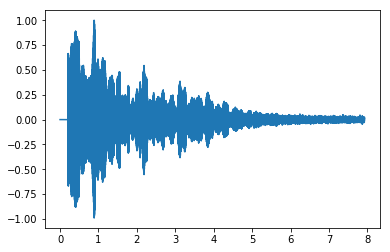

In [134]:
recv_noise = thinkdsp.read_wave('comp_noise5.wav')
recv_noise.plot()
recv_noise_spec = recv_noise.make_spectrum()
recv_noise_spec.estimate_slope()

$\beta = -0.49$, decreases, but still identifiable because the value is much greater than the situation where the compansate sound does not exist.